In [1]:
%%html
<style>h1{text-align:center;}h1{text-transform:none;}.rendered_html h4{color:#17b6eb;font-size: 1.6em;}img[alt=dia1]{width:35%;}img[alt=book]{width:20%;font-size: 3em;}img[alt=dia2]{width:50%;}.author{font-size:8px;}</style>

# Lecture 3: Analysis of Algorithms

Recap of last week's lecture:

- Definition and History of Algorithms
- Binary search is a lot faster than simple (linear) search
- Algorithm speed (running time) is not measure in seconds but in terms of *growth*
- A common way to compare running times is the __Big O notation__

Today, we will look a bit more into the __Analysis of Algorithms__

### Reasons to analyze algorithms
<div class="author"> source: https://algs4.cs.princeton.edu/home/</div>

1. to __predict__ performance -> (501ALGO)
2. to __compare__ algorithms -> (501ALGO)
3. to __provide__ guarantees -> (501ALGO)
4. to __understand__ theoretical basis -> (504TINF & 501ALGO) 

__Primary practical reason__: to __avoid__ performance bugs

### We are going to use a *scientific paradigm* to analyze algorithms
<div class="author"> source: https://algs4.cs.princeton.edu/home/</div>

__Scientific Method__
- __Observe__ a feature of the natural world
- __Hypothesize__ a model that is consistent with the observations
- __Predict__ events using the hypothesis
- __Verify__ the predictions by making further observations
- __Validate__ by repeating until the hypothesis and observations agree

__Principles__
- Experiments must be __reproducible__
- Hypotheses must be __falsifiable__


### Example: Brute-force a 3-Sum algorithm

__Goal:__ Given N distinct integers, how many triples sum to exactly zero? 

![book](img/3angrybirds.png)

__Example:__ Consider the following set: $\{30, -40, -20, -10, 40, 0, 10, 5\}$

__Solution:__ 

|a[i]|a[j]|a[k]|sum|
|---|---|---|---|
|30|-40|10|0|
|30|-20|-10|0|
|-40|40|0|0|
|-10|0|10|0|

#### Exercise: Complete the function threeSum

Implement the 3Sum algorithm using a brute force approach. The output should be the overall running time of the algorithm for a given set of integers.

In [2]:
import time

def threeSum(nums):
        start = time.time()
        sets = []
        sol = []
            
        for i in range(0, len(nums)):
            for j in range(0, len(nums)):
                for k in range(0, len(nums)):
                    if (nums[i] + nums[j] + nums[k] == 0 and i != j and i != k and j != k):
                        sol = sorted([nums[i] , nums[j] , nums[k]])
                        if sol not in sets:
                            sets.append(sol)
        end = time.time()
        return end - start
    
threeSum([30, -40, -20, -10, 40, 0, 10, 5])

6.175041198730469e-05

## 1. Data Analysis via Observations

Let's analyse our algorithm by creating a random sets of integers with arbitrary sizes and pass them to `threeSum(nums)`. Maybe we can find some distinctive features and draw some conclusions.

This is how we can generate such a "random" set:

In [3]:
import random 
random.sample(range(-100, 420), 5)


[202, -51, 63, -45, 101]

Let' plot the results for varius set sizes (50..600):

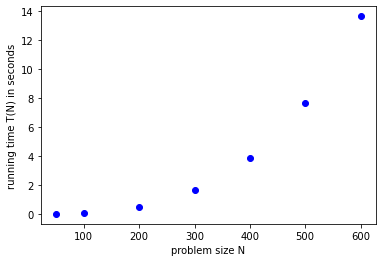

In [4]:
import matplotlib.pyplot as plt

nSize = [50, 100, 200, 300, 400, 500, 600]
timeList = [threeSum(random.sample(range(-100, 700), x)) for x in nSize]

fig, ax = plt.subplots()
ax.set(xlabel = 'problem size N',
       ylabel = 'running time T(N) in seconds')

ax.plot(nSize, timeList, "ob")
plt.show()

When we change the plot format and a apply a log-log-scale, we notice a straight line. This is typical for a __monomial__ (polynomial with only one term).

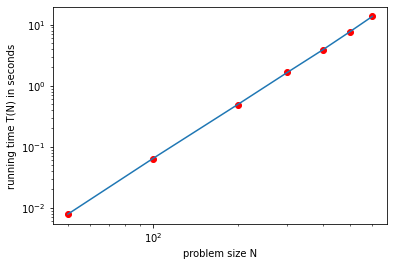

In [5]:
fig, ax = plt.subplots()
ax.set(xlabel = 'problem size N',
       ylabel = 'running time T(N) in seconds')
ax.loglog(nSize, timeList, "or")
ax.loglog(nSize, timeList)
plt.show()

Hence, let's describe the running time of our algorithm as a linear system and solve for $T(N)$: 

$log(T(N))= b \cdot log (N) + c$

$T(N)= e^{b \cdot log (N) +c}$

$T(N) = (e^{log(N)})^b \cdot e^c$

$T(N) = a \cdot N^b$, &nbsp;&nbsp;&nbsp;&nbsp;where $a=e^c$

Using linear regression, we can determine the paramters $b$, and $c$ and also calculate $a$:

In [7]:
import scipy
from scipy import stats
import numpy as np

b, c, r_value, p_value, std_err = scipy.stats.linregress(np.log(nSize), np.log(timeList))
a = np.e**c
print(a, b, c)

6.683409150518501e-08 2.9864742294788402 -16.52105253471501


Finally, let's compare our observations with our "model":

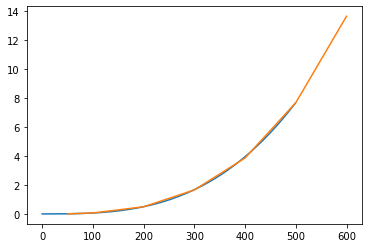

In [8]:

N = np.array(range(500))
T = np.e**c * N**b 

plt.plot(N, T)
plt.plot(nSize, timeList)
plt.show()

-> our __Hypothesis__: The running time is about $1.2 \cdot 10^{-7} \cdot N^{2.98}$ seconds.


### Prediction and Validation

__Hypothesis__: The running time is about $1.24 \cdot 10^{-7} \cdot N^{2.98}$ seconds.

__Prediction__: 13.6 seconds for N=600

In [9]:
threeSum(random.sample(range(-100, 700), 600))

14.04587697982788

### Summary of Experimental Algorithmics

##### System independent effects determine the exponent AND constant in power law
- Algorithm
- Input Data

##### System dependet effects determine the constant in power law
- Hardware: CPU, memory, cache, ...
- Software: compiler, interpreter, ...
- System: OS, network, ...

##### Drawback:
- precision of measurements

##### Advantage:
- easy and cheap


#### Exercise: Create a hypotheses for the running time of the algorithm below (using observations)

In [11]:
import time

def uselessBruteForce(sampleSize):
        start = time.time()
        set = random.sample(range(0, 7000), sampleSize)
        foo = 0
        
        for i in range(0, sampleSize):
            for j in range(0, sampleSize):
                foo = foo + set[i] - set[j] 
        end = time.time()
        return end - start
    
uselessBruteForce(500)

0.018155336380004883

## 2. Data Analysis via Mathematical Models - Tilde Notation

The total running time is determined as the sum of:
- the cost of executing each statement
- the frequency of executing each statement

$T(N) = \sum_{i=0}^n (cost \cdot frequency)$

### Prerequisites
- analyze program to determine set of operations
- cost depends on machine, compiler, etc.
- frequency depends on algorithm, input data



### Observation: Most primitive operations take constant time

|operation|example|time in nanoseconds (example)|
|:---|:---|:---|
|integer add|a + b|$c_1$=2.1|
|integer multiply|a * b|$c_2$=2.4|
|integer divide|a / b |$c_3$=5.4|
|floating-point add|a + b|$c_4$=4.6|
|floating-point multiply|a * b|$c_5$=4.2|
|floating-point divide|a / b|$c_6$=13.5|
|sine|sin(alpha)|$c_7$=91.3|
|variable declararion|int a|$c_8$=1.7|
|assignment statement|a = b|$c_9$=1.9|
|integer compare|a < b|$c_{10}$=11.3|
|array element access|a[i]|$c_{11}$=6.5|

### Example 1: Single while-loop

```python
i = 0
while i < N:
    i += 1
````

|operation|frequency|
|:---|:---|
|variable declaration|1|
|assignment statement|1|
|less than compare| N+1|
|increment|N|


### Example 2: Double while-loop

```python
i = 0
j = 0;
while i < N:
    i += 1
    while j < N:
        j += 1
````

|operation|frequency|
|:---|:---|
|variable declaration|2|
|assignment statement|2|
|less than compare| (N+1)(N+1)|
|increment|N(N)+1)|


### Tilde Notation: Technical definition

$f(n) \sim g(n)$ &nbsp;&nbsp;&nbsp;&nbsp; means &nbsp;&nbsp;&nbsp;&nbsp; $\lim_{x \to \infty}\frac{f(n)}{g(n)}=1$


The Tilde Notation estimates running time as a function of input size $N$. Itis used when we want to make a simple approximation of a complex function. It simply drops the lower order terms, because:
- when N is large, terms are negligible
- when N is small, we don't care

Tilde Notation defines both, the upper bound and lower bound of an algorithm

__Example 1:__ &nbsp;&nbsp; $\frac{1}{6}N^3 + 20N + 16$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\sim \frac{1}{6}N^3$

__Example 2:__ &nbsp;&nbsp; $\frac{1}{6}N^3 + 100N^{\frac{4}{3}} + 57$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\sim \frac{1}{6}N^3$

__Example 3:__ &nbsp;&nbsp; $\frac{1}{6}N^3 + \frac{1}{2}N^{2} + \frac{1}{3}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\sim \frac{1}{6}N^3$

### Back to Example 2: Double while-loop

|operation|frequency|tilde notation|
|:---|:---|:---|
|variable declaration|2|~ c|
|assignment statement|2|~ c|
|less than compare| (N+1)(N+1)|~$N^2$|
|increment|N(N)+1)|~$N^2$|

### How to (mostly) estimate a discrete sum

Replace the sum with an integral and use calculus.

__Example 1:__ &nbsp;&nbsp; $1 + 2 + ... + N$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\sum_{i=1}^N i \sim \int_{x=1}^N x dx \sim \frac{1}{2}N^2$

__Example 2:__ &nbsp;&nbsp; $1^k + 2^k + ... + N^k$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\sum_{i=1}^N i^k \sim \int_{x=1}^N x^k dx \sim \frac{1}{k+1}N^{k+1}$

__Example 3:__ &nbsp;&nbsp; $1 + \frac{1}{2} + ... + \frac{1}{N}$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\sum_{i=1}^N \frac{1}{i} \sim \int_{x=1}^N \frac{1}{x} = \ln{N}$

__Example 4:__ &nbsp;&nbsp; 3-sum triple loop &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\sum_{i=1}^N \sum_{j=1}^N \sum_{k=1}^N 1 \sim \int_{x=1}^N \int_{y=1}^N \int_{z=1}^N dx dy dz \sim \frac{1}{6}N^3$


### Approximate mathematical models are often preferred over acurate models

##### Exact mathematical model:

 $T_N = c_1A+c_2B+c_3C+c_4D+c_5E$
 
 $c_n$ = cost\
 $A$ = arracy access frequency\
 $B$ = integer add frequency\
 $C$ = integer compare frequence\
 $D$ = increment frequency\
 $E$ = variable assignment frequency
 
 ##### Approximate running time model:
 
 $T(N) \sim cN^3$

## 3. Order-of-Growth Classifications

### Definition

If $f(N) \sim c g(N)$ for some constant $c > 0$, then the __order of growth__ of $f(N)$ is $g(N)$.

To determine the order of growth, leading coefficients and lower-order terms can be ignored. The set of functions $\{1, log N, N, N log N, N^2, N^3, 2^N\}$ suffices to describe the order of growth of most common algorithms.
![dia2](img/3orderofgrowth.png)
<div class="author"> source: Algorithms, 4th Edition, Robert Sedwick</div>

### Common order-of-growth classifications

![dia2](img/3classification.png)
<div class="author"> source: Algorithms, 4th Edition, Robert Sedwick</div>

## 4. Theory of Algorithms

### Types of Analyses

- __1. Best Case:__ Lower bound on cost 
  - determined by "easiest input"
  - provides a goal for all inputs
  
  
- __2. Worst Case:__ Upper bound on cost
  - determined by "most difficult" input
  - provides guarantee for all inputs
  
  
- __3. Average Case:__ Expected cost for random input
  - need a model for "random" input
  - provides a way to predict performance

### Example 1: Array accesses for brute-force 3-SUM
|Case|Cost|
|---|---|
|Best|$\frac{1}{2}$$N^3$|
|Average|$\frac{1}{2}$$N^3$|
|Worst|$\frac{1}{2}$$N^3$|

### Example 2: Compares for binary search
|Case|Cost|
|---|---|
|Best|$1$|
|Average|$\lg$$N$|
|Worst|$\lg$$N$|

### Goals
- establish "difficulty" of a problem
- develop "optimal" algorithm


__Upper bound:__ Performance guarantee of algorithm for any input

__Lower bound:__ Proof that no algorithm can do better

__Optimal algorithm:__ Lower bound = upper bound (to within a constant factor).

### Commonly-used notations in the theory of algorithms

![dia2](img/3notations.png)
<div class="author"> source: Algorithms, 4th Edition, Robert Sedwick</div>

### 1. Big Oh notation

Big O notation is a mathematical notation that describes the limiting behavior of a function when the argument tends towards a particular value or infinity. In computer science, big O notation is used to classify algorithms according to how their run time or space requirements grow as the input size grows. The notation is basically used to describe the asymptotic upper bound. 

__Formal Definition:__ $f(n) = O(g(n))$ &nbsp;&nbsp;&nbsp;&nbsp; as $n\rightarrow\infty$  &nbsp;&nbsp;&nbsp;&nbsp; with $0 <= f(n) <= c \cdot g(n)$ &nbsp;&nbsp;&nbsp;&nbsp; for all $n >= n_0$

![dia1](img/3oh.webp)
<div class="author"> source: www.programiz.com</div>

### 2. Big Theta notation

Theta notation encloses the function from above and below. Since it represents the upper and the lower bound of the running time of an algorithm, it is used for analyzing the average-case complexity of an algorithm.

__Formal Definition:__ $Θ(g(n)) = f(n)$ &nbsp;&nbsp;&nbsp;&nbsp; with $c_1$, $c_2$ and $n_0$, such that $0 ≤ c_1g(n) ≤ f(n) ≤ c_2g(n)$ for all $n ≥ n_0$


![dia1](img/3theta.webp)
<div class="author"> source: www.programiz.com</div>

### 3. Big Omega notation

Omega notation represents the lower bound of the running time of an algorithm. Thus, it provides the best case complexity of an algorithm.

__Formal Definition:__ $Ω(g(n)) = f(n)$  &nbsp;&nbsp;&nbsp;&nbsp; with $c$ and $n_0$ such that $0 ≤ c g(n) ≤ f(n)$ for all $n ≥ n_0$


![dia1](img/3omega.webp)
<div class="author"> source: www.programiz.com</div>

#### Exercise 1: Big Oh notation

Assume that each of the expressions below gives the processing time $T(n)$ spent by an algorithm for solving a problem of size $n$. Select the dominant term(s) having the steepest increase in $n$ and specify the lowest Big-Oh complexity of each algorithm.
![dia2](img/3bigoex.png)




### Solution

![dia2](img/3bigoexsol.png)

#### Exercise 2: Big Oh notation

The statements below show some features of "Big-Oh" notation for the functions $f=f(n)$ and $g=g(n)$. Determine whether each statement is TRUE or FALSE and correct the formula in the latter case.

![dia2](img/3bigoex2.png)

### Solution

![dia2](img/3bigoex2sol.png)

#### Exercise 3: Big Oh notation

A quadratic algorithm with processing time $T(n) = cn^2$ spends T(N) seconds for processing $N$ data items. How much time will be spent for processing $n=5000$ data items, assuming that $N=100$ and $T(N)=1ms$?

### Solution

The constant factor $c=\frac{T(N)}{N^2}$, therefore $T(n)=T(N)\frac{n^2}{N^2}=\frac{n^2}{10000}ms$ and $T(5000)=2500ms$.

#### Exercise 4: Big Oh notation

Algorithms A and B spend exactly $T_A(n) = 5 n\log_{10} n$ and $T_B(n) = 25n$ microseconds, respectively, for a problem of size $n$. Which algorithm is better in the Big-Oh sense? For which problem sizes does it outperform the other?


### Solution

In the Big-Oh sense, the algorithm B is better. It outperforms the algorithm A if $T_B(n) ≤ T_A(n)$, that is, if $25n ≤ 5n \cdot log_{10}n$, or $log_{10}n ≥ 5$, or $n ≥ 100000$.
